In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import base_style
sns.set_style("white", base_style.base_style)
sns.set_context("talk", font_scale=1.5)

# MDF imports
#from mdf_dataworks.toolbox import login
from mdf_forge import forge

# Perform search by elements

In [2]:
elements = ["*"]
sources = ["oqmd"]

mdf = forge.Forge()
res = mdf.search_by_elements(elements=elements, sources=sources, limit=10000)

# Combine results into a Dataframe

In [3]:
stability_gap = [(r.get("mdf").get("composition"), 
                  r.get("oqmd",{}).get("stability"),
                  r.get("oqmd",{}).get("band_gap")) for r in res]
df = pd.DataFrame(stability_gap, columns=["composition","stability","band_gap"]).dropna()
df = df.dropna()
df.head(20)

,composition,stability,band_gap
0,Lu1,0.012590,0.000
2,As1Y1,0.000044,0.000
4,Ge4O11,0.282271,2.613
5,Ge2Li3O6,0.191445,0.000
7,Mg1Y2,0.028971,0.000
8,O3Sn1,0.479129,1.261
12,O11Pd4,0.053285,0.000
15,Li3O6Pt2,0.128904,0.000
16,O11Rh4,0.260767,0.000
18,O3Rh1,0.344011,0.000


# Plot results

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


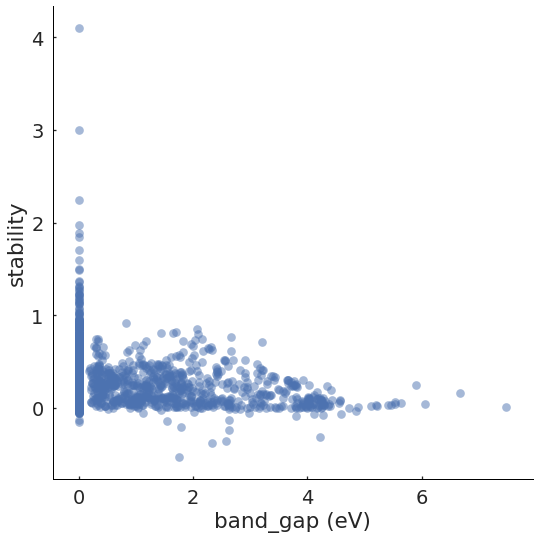

In [4]:
pal = sns.color_palette("muted")

x_col = "band_gap"
y_col = "stability"

# Make plot
g = sns.lmplot(x=x_col, y=y_col, data=df, fit_reg=False, size=8, 
                               scatter_kws={"s": 75, "alpha": 0.5})
# Set axis labels
g.set_axis_labels(x_col + " (eV)", y_col)